In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import ensemble_project as ens

from keras.datasets import reuters, imdb
from keras.preprocessing.text import Tokenizer
import keras

from sklearn.model_selection import train_test_split

from scipy.io import arff
import pandas as pd
import numpy as np

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=300)

In [4]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

? ? and ? movie ? ? great ? good acting and one of the most ? movies i have seen in a while i never saw such an interesting ? when i was in ? my ? ? it so much she ? me to ? on and ? it so other would ? too


In [5]:
def vectorize_sequences(sequences, dimension=300):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
X_train = vectorize_sequences(train_data)
#X_test = vectorize_sequences(test_data)

print("x_train ", X_train.shape)
#print("x_test ", X_test.shape)

x_train  (25000, 300)


In [7]:
y_train = np.asarray(train_labels).astype('float32')
#y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
#print("y_test ", y_test.shape)

y_train  (25000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [10]:
#41.4s sürdü
bagging_100vs10x10, eoe_bagging_100vs10x10, bagging_vs_ens, df_bagging_100vs10x10, df_diff_bagging_100vs10x10 = ens.baggingClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [11]:
#33.9s sürdü
ada_100vs10x10, eoe_ada_100vs10x10, ada_vs_ens, df_ada_100vs10x10, df_diff_ada_100vs10x10 = ens.adaBoostClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [12]:
#48.3s sürdü
#random subspace
rs_100vs10x10, eoe_rs_100vs10x10, rs_vs_ens, df_rs_100vs10x10, df_diff_rs_100vs10x10 = ens.randomSubspaceClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [13]:
#2m 40.7s sürdü
#random subspace
rf_100vs10x10, eoe_rf_100vs10x10, rf_vs_ens, df_rf_100vs10x10, df_diff_rf_100vs10x10 = ens.randomForestClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [14]:
#30.2s sürdü
#random subspace
extra_100vs10x10, eoe_extra_100vs10x10, extra_vs_ens, df_extra_100vs10x10, df_diff_extra_100vs10x10 = ens.extraTreesClassifier_100vs10x10(X_train, X_test, y_train, y_test)

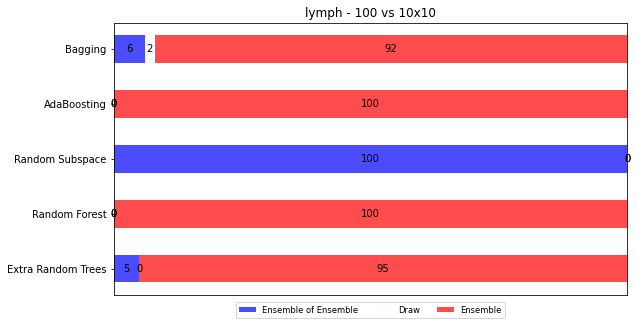

In [15]:
category_names = ['Ensemble of Ensemble', 'Draw','Ensemble']
results = {
    'Bagging': bagging_vs_ens,
    'AdaBoosting': ada_vs_ens,
    'Random Subspace' :rs_vs_ens,
    'Random Forest': rf_vs_ens,
    'Extra Random Trees' : extra_vs_ens   
}
data_name = 'lymph - 100 vs 10x10'

fig, ax = ens.plot_ensemble_vs_eoe(results, category_names,data_name)

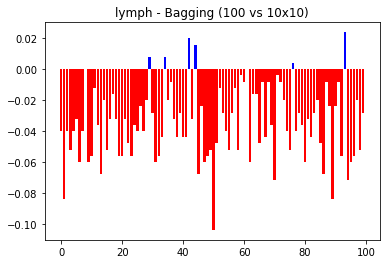

In [16]:
ens.plot_diff(df_diff_bagging_100vs10x10,'lymph - Bagging (100 vs 10x10)')

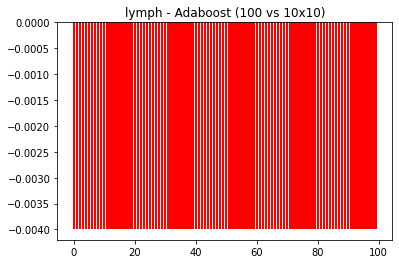

In [17]:
ens.plot_diff(df_diff_ada_100vs10x10,'lymph - Adaboost (100 vs 10x10)')

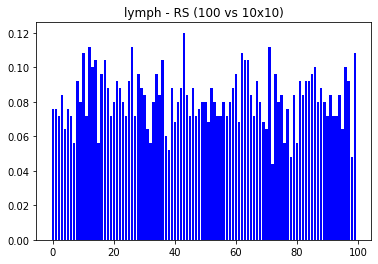

In [18]:
ens.plot_diff(df_diff_rs_100vs10x10,'lymph - RS (100 vs 10x10)')

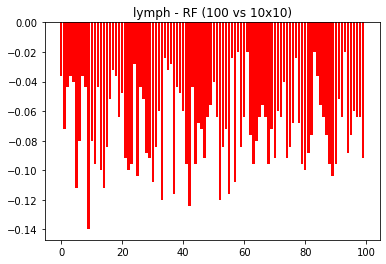

In [19]:
ens.plot_diff(df_diff_rf_100vs10x10,'lymph - RF (100 vs 10x10)')

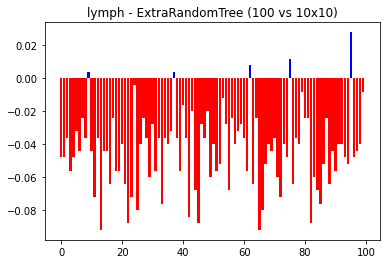

In [20]:
ens.plot_diff(df_diff_extra_100vs10x10,'lymph - ExtraRandomTree (100 vs 10x10)')

In [21]:
#3m 29.9s sürdü
bagging_100vs10x100, eoe_bagging_100vs10x100, bagging_vs_ens_100, df_bagging_100vs10x100, df_diff_bagging_100vs10x100 = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)

KeyboardInterrupt: 

In [ ]:
#2m 39.5s sürdü
ada_100vs10x100, eoe_ada_100vs10x100, ada_vs_ens_100, df_ada_100vs10x100, df_diff_ada_100vs10x100 = ens.adaBoostClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [ ]:
#46m 5s sürdü
#random subspace
rs_100vs10x100, eoe_rs_100vs10x100, rs_vs_ens_100, df_rs_100vs10x100, df_diff_rs_100vs10x100 = ens.randomSubspaceClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [ ]:
#2m 52.7s sürdü
#random subspace
rf_100vs10x100, eoe_rf_100vs10x100, rf_vs_ens_100, df_rf_100vs10x100, df_diff_rf_100vs10x100 = ens.randomForestClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [ ]:
#2m 52.7s sürdü
#random subspace
extra_100vs10x100, eoe_extra_100vs10x100, extra_vs_ens_100, df_extra_100vs10x100, df_diff_extra_100vs10x100 = ens.extraTreesClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [ ]:
category_names = ['Ensemble of Ensemble', 'Draw','Ensemble']
results = {
    'Bagging': bagging_vs_ens_100,
    'AdaBoosting': ada_vs_ens_100,
    'Random Subspace' :rs_vs_ens_100,
    'Random Forest': rf_vs_ens_100,
    'Extra Random Trees' : extra_vs_ens_100   
}
data_name = 'lymph - 100 vs 10x100'

fig, ax = ens.plot_ensemble_vs_eoe(results, category_names,data_name)

In [ ]:
ens.plot_diff(df_diff_bagging_100vs10x100,'lymph - Bagging (100 vs 10x100)')

In [ ]:
ens.plot_diff(df_diff_ada_100vs10x100,'lymph - Adaboost (100 vs 10x100)')

In [ ]:
ens.plot_diff(df_diff_rs_100vs10x100,'lymph - RS (100 vs 10x100)')

In [ ]:
ens.plot_diff(df_diff_rf_100vs10x100,'lymph - RF (100 vs 10x100)')

In [ ]:
ens.plot_diff(df_diff_extra_100vs10x100,'lymph - ExtraRandomTree (100 vs 10x100)')

In [ ]:
all_df = ens.single_vote_stack(X_train, X_test, y_train, y_test)

In [ ]:
all_df

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
name = all_df[0]
acc = all_df[1]
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

ax.set_xlim(0,1)

# Horizontal Bar Plot
ax.barh(name, acc)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('lymph Ensemble - EoE Voting - EoE Stack', loc ='center')
 

 
# Show Plot
plt.show()